In [1]:
# Data Preprocessing

In [2]:
#!pip list

* проверка установленных библиотек для возможности дальнейшей корректной работы.

In [3]:
# !pip install -r requirements.txt

* установка всех пакетов данных 

In [4]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* импорт необходимых библиотек 

In [5]:
# Importing the dataset
df = pd.read_csv('Invest.csv', sep=';')

* импорт соответсвующего датасета. Он содержит в себе различные социально-экономическиие показатели, которые в конечном итоге показывают сможет ли человек сберегать какие-либо средства или все полученные им деньги тратятся на проживание. Данные получены с Kaggle: https://www.kaggle.com/johnnyyiu/predicting-poverty. 

* к исходным переменным добавлены новые, которые так же интересно будет включить в модель (например, как грамотность человека, кол-во финансовой активности за предыдущий год). В соответствии с эти посмотрим, как изменится модель и ее показатели. Однако, к сожалению, из всех предоставленных данных - многие предикторы не имеют своего описания и какого-либо пояснения, поэтому сразу были исключены.

ИСТОЧНИК ВВП (на душу населения): https://ru.tradingeconomics.com/country-list/gdp-per-capita?continent=europe

In [6]:
df.shape

(8400, 28)

* Итак, датасет содержит в себе 8400 наблюдений и 28 переменных. Опишем детально каждую переменную и какие задачи могут быть поставлены в связи с этим.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                8400 non-null   object 
 1   is_urban                               8400 non-null   bool   
 2   age                                    8400 non-null   int64  
 3   female                                 8400 non-null   bool   
 4   married                                8400 non-null   bool   
 5   religion                               8400 non-null   object 
 6   relationship_to_hh_head                8400 non-null   object 
 7   education_level                        8251 non-null   float64
 8   can_calc_percents                      8400 non-null   bool   
 9   employment_type_last_year              8400 non-null   object 
 10  income_government_last_year            8400 non-null   bool   
 11  inco

В данной работе, как было уже сказано ранее - набор социально-экономический параметров, который показывают уровень жизни человека. Был проведен опрос европейского населения (ТОП-7 стран по ВВП (на душу населения)) из разных слоев общества и с разным материальным состоянием. В качестве зависимой переменной целесообразно выбрать formal_savings. То есть получим задачу классификации, которая по всем имеющимся показателям будет выявлять сможет ли конкретная личность сохранить какие-то средства, сделать сбережения или его уровень заработка достаточный только для проживания, без каких-либо отложенных денег.
Однако, для построения регрессионных моделей можно выделить другого рода задачу. Исходя из вариативности и интереса в дальнейшей работе было решено зависимой переменной сделать Country. Таким образом, имеем следующую задачу - выявить какие предикторы максимальным образом описывают социально-экономическое положение стран и сделать вывод достаточно ли по такому количеству переменных строить модель и делать какие-либо прогнозы.


Начнем знакомство с переменными. Их наибольшее число (19):
 1. Is Urban - переменная, которая показывает в какой местности обитает человек. Логично предположить, что городское население имеет большее состояние, нежели сельский житель.
 2. Female - как влияет пол на состоятельность. По данным статьи Euronews - на каждый евро, заработанный мужчиной в среднем, - женщина получает 86 центов. 
 3. Married - женат/замужем. Данный показатель имеет значение в том плане, что если человек одинок - все его заработанные средства остаются при нем, а в противном случае растраты осуществляются на близких людей.
 4. Can_calc_percents - интересное наблюдение выявлено в том, что % людей, которые умеет высчитывать проценты имеют больший заработок.
 5. Income_government_last_year - получение денежных средств от государства увеличивает состояние человека, однако это может быть пенсия, а поэтому и не будет дополнительных источников прибыли.
 6. Num_times_borrowed_last_year - сколько раз человек брал в долг за прошлый год. Логично предположить, что чем больше это число, тем меньше шанс на высокий уровень экономического состояния.
 7. Advanced_phone_user -переменная подразумевает уверенное пользование телефоном (соц сети, банковские приложения и т.д.) То есть то, что присущи в большой мере для молодого слоя населения. И как показывают данные - если показатель true, то шанс на состояние выше.
 8. active_bank_user - простой пример того, что если человек активно пользуется банковкими услугами - вероятность на его состояние больше.
 9. cash_property_savings - есть ли у человека дополнительный заработок от сдачи в аренду имущества 
 10. has_insurance - данная переменная в кой-то мере является показателем экономического благополучия. Считается, что застрахованный человек имеет на своем счету больше средств.
 11. borrowed_for_emergency_last_year - брал в долг на лечение. Показатель того, что человек либо не имеет денег на собственное выздоровление, либо имел сложную болезнь/операцию и теперь явно будет иметь меньше денежных средств.
 12. borrowed_for_daily_expenses_last_year - брал в долг на ежедневные товары. Эта переменная явно показывает, что у человека не все в порядке с деньгами.
 
 13. 
 14. 
 15. can_call can_text can_use_internet - образованность человека в данном плане прямым образом показывает, что в случае положительного результата шанс на экономическое состояние значительно больше нежели в обратном случае.
 16. can_make_transaction - экономическач грамотность так же показатель большего уровня достатка.
 17. has_investment - у людей, которые имеют какого рода инвестии больше уровень достатка.
 18. literacy - грамотность так же связана с тем сможет ли человек заработать деньги и наблюдения демонстрируют, что у грамотных людей выше заработная возможность.
 19. formal_savings (Y)  - непосредственно есть ли у человека какие-то сбережения, что показывает его экономическое состояние.

Переменная типа float - education_level. Исследования показывают, что чем выше образованность у человека, тем больше шанс иметь высокий достаток. Переменная содержит значения от 0 до 3, где 0 -неполное среднее, 1 - среднее, 2 - неполное высшее и 3- высшее образование.

Переменные типа int:
    1. Age - непосредственно возраст человека.
    2. num_times_borrowed_last_year - кол-во раз, когда занимал у кого-то в прошлом году. Чем больше этот показетель, тем меньше финансовое состояние.
    3. phone_ownership - количество телефонов. Прямая зависимость от состояния.
    4. num_financial_activities_last_year - кол-во финансовых активностей в прошлом году. Так же прямая зависимость от состояния.

 Переменные типа object:
  1. Country - здесь мы имеем 7 стран Европы, которые имеют самые высокие показатели ВВП на душу населения. Описание каждой страны будет предоставлено ниже.
  2. Religion - имеем данные о 5 религиях, которые распространены у европейского населения, просшедшего опрос. Таким образом это: PRS - православние, AGN - агностицизм, CAT - католики, BUD -буддисты и N - национальня религия. Поэтому интересно, как религия влияет на экономическое состояние.
  3. relationship_to_hh_head - кем является в семье (отец, дочь/сын, глава семьи и т.д.)
  4. employment_type_last_year - какой тип занятости в прошлом году (работал, сезонная занятость, безработные ...)

In [8]:
df.head (20)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,G,False,57,True,True,PRS,Father/Mother,3.0,True,salaried,...,False,True,True,True,True,2,False,0,True,False
1,F,False,40,False,True,AGN,Head,0.0,False,salaried,...,False,False,False,False,False,2,False,0,True,True
2,IS,False,35,True,True,CAT,Spouse,1.0,False,not_working,...,True,True,True,False,False,2,False,2,False,False
3,IS,True,19,True,False,CAT,Son/Daughter,3.0,False,salaried,...,False,True,False,False,False,1,False,0,True,False
4,GB,False,61,True,True,CAT,Father/Mother,0.0,False,not_working,...,True,False,False,False,False,1,False,0,False,False
5,GB,True,16,True,False,CAT,Son/Daughter,2.0,False,not_working,...,True,True,True,True,True,1,False,0,True,False
6,G,False,40,False,True,CAT,Head,0.0,False,self_employed,...,False,False,False,False,False,0,True,0,False,False
7,F,False,27,True,True,AGN,Spouse,0.0,False,not_working,...,False,False,False,False,False,0,False,1,False,True
8,GB,True,35,False,True,CAT,Head,3.0,True,salaried,...,False,True,True,True,True,2,True,2,True,True
9,P,False,72,True,False,PRS,Head,1.0,False,self_employed,...,False,False,False,False,False,2,False,4,False,True


* вывод первых 10 строк для просмотра содержимого в таблице данных

In [9]:
df['country'].unique()

array(['G', 'F', 'IS', 'GB', 'P', 'IT', 'AU'], dtype=object)

* данная чанка выводит все существующие различные значения по переменной country. Это было сделано с целью дальнейшей кодировки, однако данное действие в последствии не будет осуществленно (о чем будет сказано позже) 

In [10]:
df['religion'].unique()

array(['PRS', 'AGN', 'CAT', 'BUD', 'N'], dtype=object)

* аналогичное действие для переменной religion

In [11]:
df['education_level'].unique()

array([ 3.,  0.,  1.,  2., nan])

In [12]:
df['employment_type_last_year'].unique()

array(['salaried', 'not_working', 'self_employed', 'other',
       'irregular_seasonal'], dtype=object)

In [13]:
df['relationship_to_hh_head'].unique()

array(['Father/Mother', 'Head', 'Spouse', 'Son/Daughter',
       'Sister/Brother', 'Other', 'Unknown'], dtype=object)

* получена дополнительная информацияпо датасету. Он содержит 8400 наблюдеий и 26 различных переменных.

# Visualization

Для каждой количественной переменной построим диаграммы.Визуализация данных покажет их распределения и можно будет сделать первичный вывод о наличии/отсутвии выбросов в переменной. Поскольку количество предикторов не велико - можно вывести диаграмму для каждого отдельно. 

<AxesSubplot:ylabel='Frequency'>

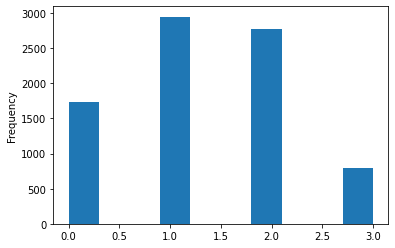

In [14]:
# Feature distribution
df['education_level'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

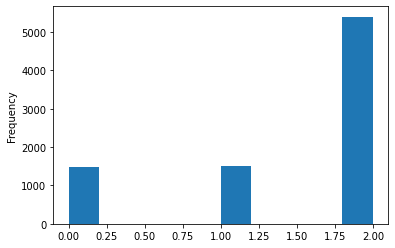

In [15]:
# Feature distribution
df['phone_ownership'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

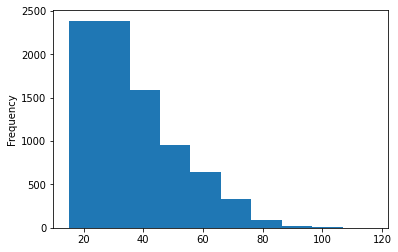

In [16]:
# Feature distribution
df['age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

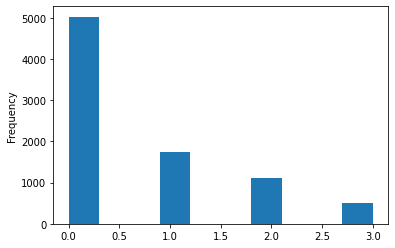

In [17]:
# Feature distribution
df['num_times_borrowed_last_year'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

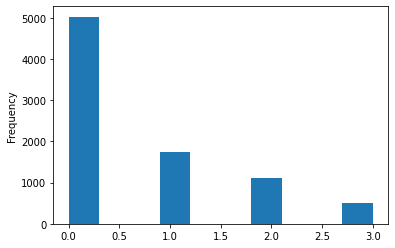

In [18]:
# Feature distribution
df['num_times_borrowed_last_year'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

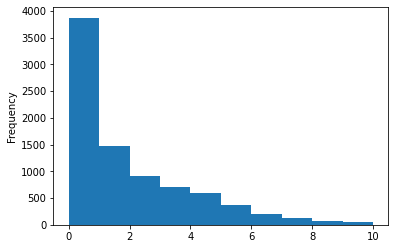

In [19]:
# Feature distribution
df['num_financial_activities_last_year'].plot(kind = 'hist')

* Все переменные, кроме Age маловариативны и изменяются в небольшом интервале. Переменная Age имеет небольшой хвост (возможно в исходных данных была опечатка) - поэтому ее следует проверить на выброс, однако шкалирование производиться не будет.

In [20]:
import seaborn as sns 

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


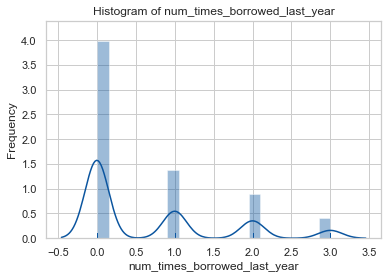

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


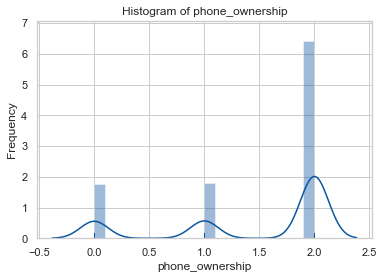

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


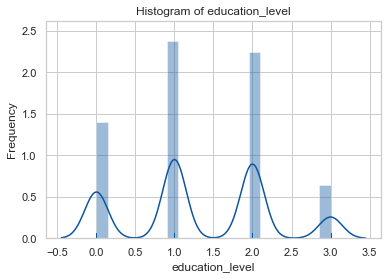

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


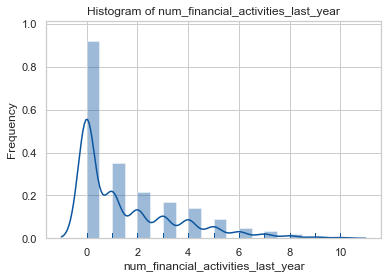

In [21]:
num_cols = ['num_times_borrowed_last_year','phone_ownership','education_level','num_financial_activities_last_year'] 

def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(df, num_cols, bins = 20, hist = True)

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


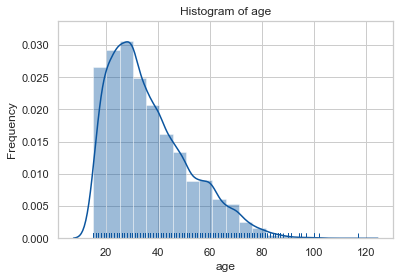

In [22]:
num_cols = ['age'] 

def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(df, num_cols, bins = 20, hist = True)

* Второй способ визуализации данных для более ясного понимания переменных.

# Statistics

In [23]:
# Dataset Statistics
df.describe()

,age,education_level,num_times_borrowed_last_year,phone_ownership,num_financial_activities_last_year
count,8400.000000,8251.000000,8400.000000,8400.000000,8400.000000
mean,36.501667,1.319476,0.655714,1.465833,1.545833
std,15.310214,0.911200,0.924738,0.776347,2.024094
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,0.000000,2.000000,1.000000
75%,45.000000,2.000000,1.000000,2.000000,3.000000
max,117.000000,3.000000,3.000000,2.000000,10.000000


Описательная статистика выводит только количественные переменные. Соответсвенно в модели их 4. Переменная education_Level имеет пропуски. А переменная Аge содержит значения, которые выходят за 3 сигма.

# Missing data

In [24]:
# Cheking Missing data
df.isnull().sum()

country                                    0
is_urban                                   0
age                                        0
female                                     0
married                                    0
religion                                   0
relationship_to_hh_head                    0
education_level                          149
can_calc_percents                          0
employment_type_last_year                  0
income_government_last_year                0
income_own_business_last_year              0
num_times_borrowed_last_year               0
advanced_phone_use                         0
active_bank_user                           0
cash_property_savings                      0
has_insurance                              0
borrowed_for_emergency_last_year           0
borrowed_for_daily_expenses_last_year      0
can_call                                   0
can_text                                   0
can_use_internet                           0
can_make_t

* пропущено 149 значений по переменной education_level.

In [25]:
df.dtypes

country                                   object
is_urban                                    bool
age                                        int64
female                                      bool
married                                     bool
religion                                  object
relationship_to_hh_head                   object
education_level                          float64
can_calc_percents                           bool
employment_type_last_year                 object
income_government_last_year                 bool
income_own_business_last_year               bool
num_times_borrowed_last_year               int64
advanced_phone_use                          bool
active_bank_user                            bool
cash_property_savings                       bool
has_insurance                               bool
borrowed_for_emergency_last_year            bool
borrowed_for_daily_expenses_last_year       bool
can_call                                    bool
can_text            

* информация о типе каждой переменной

In [26]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric


imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['education_level']] = imputer_freq.fit_transform(dfm[['education_level']])

* поскольку переменная education_level содержала пропущенные значения - принято решение заполнить их наиболее часто встречающимися значениями. Средним значением заполнять не целесообразно, т.к. переменная маловариативна (от 0 до 3) и каждому значению соответсвует определенное значение.

In [27]:
dfm.isnull().sum()

country                                  0
is_urban                                 0
age                                      0
female                                   0
married                                  0
religion                                 0
relationship_to_hh_head                  0
education_level                          0
can_calc_percents                        0
employment_type_last_year                0
income_government_last_year              0
income_own_business_last_year            0
num_times_borrowed_last_year             0
advanced_phone_use                       0
active_bank_user                         0
cash_property_savings                    0
has_insurance                            0
borrowed_for_emergency_last_year         0
borrowed_for_daily_expenses_last_year    0
can_call                                 0
can_text                                 0
can_use_internet                         0
can_make_transaction                     0
phone_owner

* пропуски заполнены

In [28]:
df['age'].describe()

count    8400.000000
mean       36.501667
std        15.310214
min        15.000000
25%        25.000000
50%        33.000000
75%        45.000000
max       117.000000
Name: age, dtype: float64

In [29]:
# Outliers
age = []
for ag in dfm['age']:
    if ag > round(dfm['age'].mean() + 3*dfm['age'].std()):
        ag = round(dfm['age'].mean() + 3*dfm['age'].std()) 
    age.append(ag)
dfm['age'] = age

# Outliers
age = []
for ag in dfm['age']:
    if ag < round(dfm['age'].mean() - 3*dfm['age'].std()):
        ag = round(dfm['age'].mean() - 3*dfm['age'].std()) 
    age.append(ag)
dfm['age'] = age

In [30]:
dfm['age'].describe()

count    8400.000000
mean       36.459405
std        15.165940
min        15.000000
25%        25.000000
50%        33.000000
75%        45.000000
max        82.000000
Name: age, dtype: float64

* выброс был заменен максимально допустимым значением.

D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python_Anaconda\envs\LAB\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


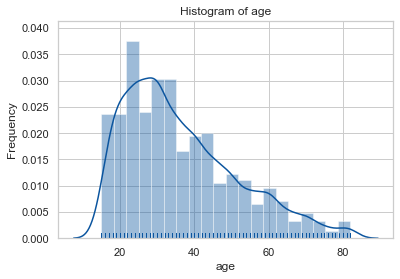

In [31]:
num_cols = ['age'] 

def plot_density_hist(dfm, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(dfm, num_cols, bins = 20, hist = True)

*Распределение переменной на графике приблизилось к нормальному, выбросов не наблюдается.

In [32]:
# Log Transformations for Skewed Distributions
#dfm[['age']] = np.log(dfm[['age']])

#import seaborn as sns
#sns.set()
#sns.pairplot(dfm)

In [33]:
# Dataset Statistics
df.describe()

,age,education_level,num_times_borrowed_last_year,phone_ownership,num_financial_activities_last_year
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,36.459405,1.313810,0.655714,1.465833,1.545833
std,15.165940,0.904066,0.924738,0.776347,2.024094
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,1.000000,0.000000
50%,33.000000,1.000000,0.000000,2.000000,1.000000
75%,45.000000,2.000000,1.000000,2.000000,3.000000
max,82.000000,3.000000,3.000000,2.000000,10.000000


# Encoding

Smart

In [34]:
dfm.head(10)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,G,False,57,True,True,PRS,Father/Mother,3.0,True,salaried,...,False,True,True,True,True,2,False,0,True,False
1,F,False,40,False,True,AGN,Head,0.0,False,salaried,...,False,False,False,False,False,2,False,0,True,True
2,IS,False,35,True,True,CAT,Spouse,1.0,False,not_working,...,True,True,True,False,False,2,False,2,False,False
3,IS,True,19,True,False,CAT,Son/Daughter,3.0,False,salaried,...,False,True,False,False,False,1,False,0,True,False
4,GB,False,61,True,True,CAT,Father/Mother,0.0,False,not_working,...,True,False,False,False,False,1,False,0,False,False
5,GB,True,16,True,False,CAT,Son/Daughter,2.0,False,not_working,...,True,True,True,True,True,1,False,0,True,False
6,G,False,40,False,True,CAT,Head,0.0,False,self_employed,...,False,False,False,False,False,0,True,0,False,False
7,F,False,27,True,True,AGN,Spouse,0.0,False,not_working,...,False,False,False,False,False,0,False,1,False,True
8,GB,True,35,False,True,CAT,Head,3.0,True,salaried,...,False,True,True,True,True,2,True,2,True,True
9,P,False,72,True,False,PRS,Head,1.0,False,self_employed,...,False,False,False,False,False,2,False,4,False,True


In [35]:
# Cheking categorical data
dfs = dfm[['religion']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,religion,5,"[PRS, AGN, CAT, BUD, N]",object


In [36]:
# Encoding
rl = {'CAT':0,'PRS':1,'AGN':2,'BUD':3, 'N':4}
dfm['religion'] = dfm['religion'].map(rl)
dfm.head (20)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,G,False,57,True,True,1,Father/Mother,3.0,True,salaried,...,False,True,True,True,True,2,False,0,True,False
1,F,False,40,False,True,2,Head,0.0,False,salaried,...,False,False,False,False,False,2,False,0,True,True
2,IS,False,35,True,True,0,Spouse,1.0,False,not_working,...,True,True,True,False,False,2,False,2,False,False
3,IS,True,19,True,False,0,Son/Daughter,3.0,False,salaried,...,False,True,False,False,False,1,False,0,True,False
4,GB,False,61,True,True,0,Father/Mother,0.0,False,not_working,...,True,False,False,False,False,1,False,0,False,False
5,GB,True,16,True,False,0,Son/Daughter,2.0,False,not_working,...,True,True,True,True,True,1,False,0,True,False
6,G,False,40,False,True,0,Head,0.0,False,self_employed,...,False,False,False,False,False,0,True,0,False,False
7,F,False,27,True,True,2,Spouse,0.0,False,not_working,...,False,False,False,False,False,0,False,1,False,True
8,GB,True,35,False,True,0,Head,3.0,True,salaried,...,False,True,True,True,True,2,True,2,True,True
9,P,False,72,True,False,1,Head,1.0,False,self_employed,...,False,False,False,False,False,2,False,4,False,True


In [37]:
df.religion.head(20)

0     1
1     2
2     0
3     0
4     0
5     0
6     0
7     2
8     0
9     1
10    2
11    0
12    0
13    1
14    0
15    1
16    0
17    1
18    1
19    2
Name: religion, dtype: int64

* далее осуществляется шкалирование данных. Для переменной religion шкалирование сделано вручную, с определенной последовательностью (по мере влияния религии). Однако для переменной country так же была принята данная попытка, в результате дальнейшей работы было выявлено, что качество модели значительно ухудшается (значение для R^2 падает от 40% до 12%), поэтому ручное шкалирование не производится.

In [38]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [39]:
# Encoding categorical data
dfm = encoding_char(dfm)
dfm

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,0,False,57,True,True,1,0,3.0,True,0,...,False,True,True,True,True,2,False,0,True,False
1,1,False,40,False,True,2,1,0.0,False,0,...,False,False,False,False,False,2,False,0,True,True
2,2,False,35,True,True,0,2,1.0,False,1,...,True,True,True,False,False,2,False,2,False,False
3,2,True,19,True,False,0,3,3.0,False,0,...,False,True,False,False,False,1,False,0,True,False
4,3,False,61,True,True,0,0,0.0,False,1,...,True,False,False,False,False,1,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,5,True,63,False,True,1,1,1.0,False,2,...,True,True,True,False,True,2,True,5,True,True
8396,4,False,59,False,False,1,0,1.0,False,2,...,False,False,False,False,False,0,False,0,False,False
8397,3,False,21,True,True,0,2,1.0,False,1,...,False,True,False,False,False,2,False,1,False,False
8398,0,True,32,False,True,1,1,3.0,False,0,...,False,True,True,True,True,2,True,3,True,True


* Все остальные переменные также были отшкалированы.

# ПОЯСНЕНИЕ (для стран)
0 - Germany
1 - France
2 - Spain
3 - Great Britain
4 - Poland
5 - Italy
6 - Australia

In [40]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                8400 non-null   int64  
 1   is_urban                               8400 non-null   bool   
 2   age                                    8400 non-null   int64  
 3   female                                 8400 non-null   bool   
 4   married                                8400 non-null   bool   
 5   religion                               8400 non-null   int64  
 6   relationship_to_hh_head                8400 non-null   int64  
 7   education_level                        8400 non-null   float64
 8   can_calc_percents                      8400 non-null   bool   
 9   employment_type_last_year              8400 non-null   int64  
 10  income_government_last_year            8400 non-null   bool   
 11  inco

In [41]:
dfm.head(20)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,can_calc_percents,employment_type_last_year,...,borrowed_for_daily_expenses_last_year,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy,formal_savings (Y)
0,0,False,57,True,True,1,0,3.0,True,0,...,False,True,True,True,True,2,False,0,True,False
1,1,False,40,False,True,2,1,0.0,False,0,...,False,False,False,False,False,2,False,0,True,True
2,2,False,35,True,True,0,2,1.0,False,1,...,True,True,True,False,False,2,False,2,False,False
3,2,True,19,True,False,0,3,3.0,False,0,...,False,True,False,False,False,1,False,0,True,False
4,3,False,61,True,True,0,0,0.0,False,1,...,True,False,False,False,False,1,False,0,False,False
5,3,True,16,True,False,0,3,2.0,False,1,...,True,True,True,True,True,1,False,0,True,False
6,0,False,40,False,True,0,1,0.0,False,2,...,False,False,False,False,False,0,True,0,False,False
7,1,False,27,True,True,2,2,0.0,False,1,...,False,False,False,False,False,0,False,1,False,True
8,3,True,35,False,True,0,1,3.0,True,0,...,False,True,True,True,True,2,True,2,True,True
9,4,False,72,True,False,1,1,1.0,False,2,...,False,False,False,False,False,2,False,4,False,True


In [42]:
dfm.dtypes

country                                    int64
is_urban                                    bool
age                                        int64
female                                      bool
married                                     bool
religion                                   int64
relationship_to_hh_head                    int64
education_level                          float64
can_calc_percents                           bool
employment_type_last_year                  int64
income_government_last_year                 bool
income_own_business_last_year               bool
num_times_borrowed_last_year               int64
advanced_phone_use                          bool
active_bank_user                            bool
cash_property_savings                       bool
has_insurance                               bool
borrowed_for_emergency_last_year            bool
borrowed_for_daily_expenses_last_year       bool
can_call                                    bool
can_text            

# CORRELATIONS

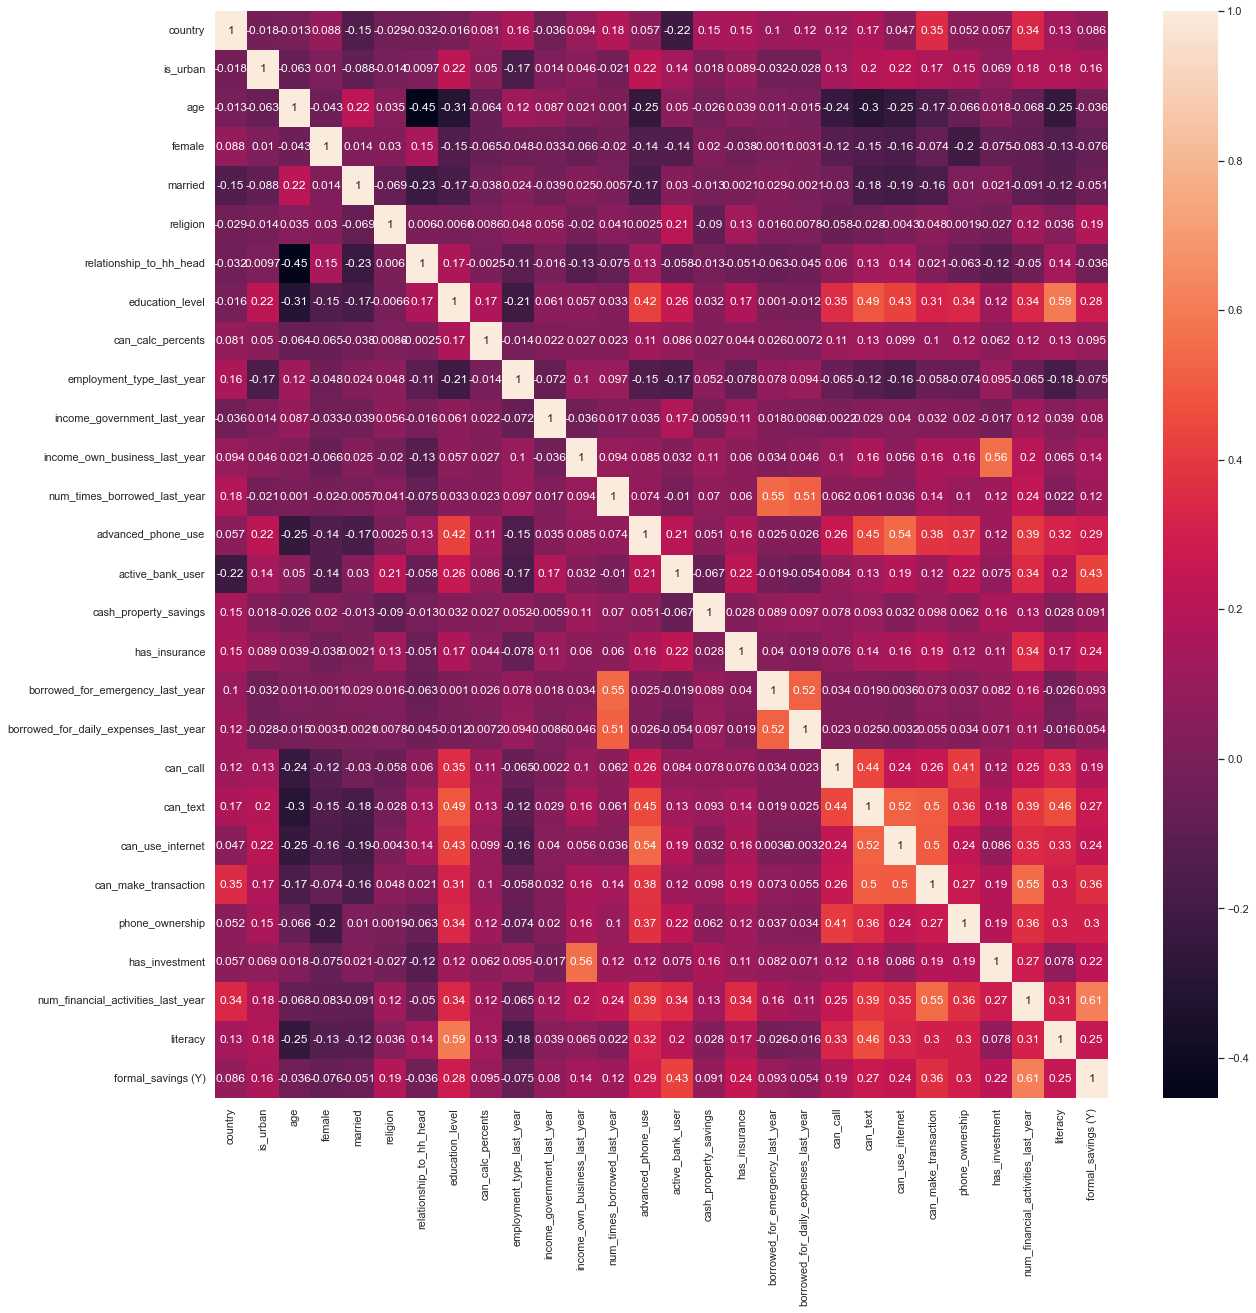

In [43]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [44]:
# Removing Correlated Data
dfr = df.drop(['borrowed_for_emergency_last_year','can_use_internet','advanced_phone_use','can_text','borrowed_for_daily_expenses_last_year','relationship_to_hh_head','formal_savings (Y)','education_level'], axis='columns', inplace=False)
dfr.shape

(8400, 20)

* Корреляционная матрица показывает влияние переменных между собой. Исходя из этого, можно выделить переменные, которые сильно коррелируемы и исключить из модели ту, которая имеет меньшее влияние на У. Для случая линейной регрессии зависимой переменной является Country. А дальнейшая работа с моделью (построение регрессии и нейронной сети) поможет ответить на вопрос какие из предложенных социально-экономических переметров наиболее влиятельны и значимы для стран. Таким образом из моделb удалены некоторые столбцы. 

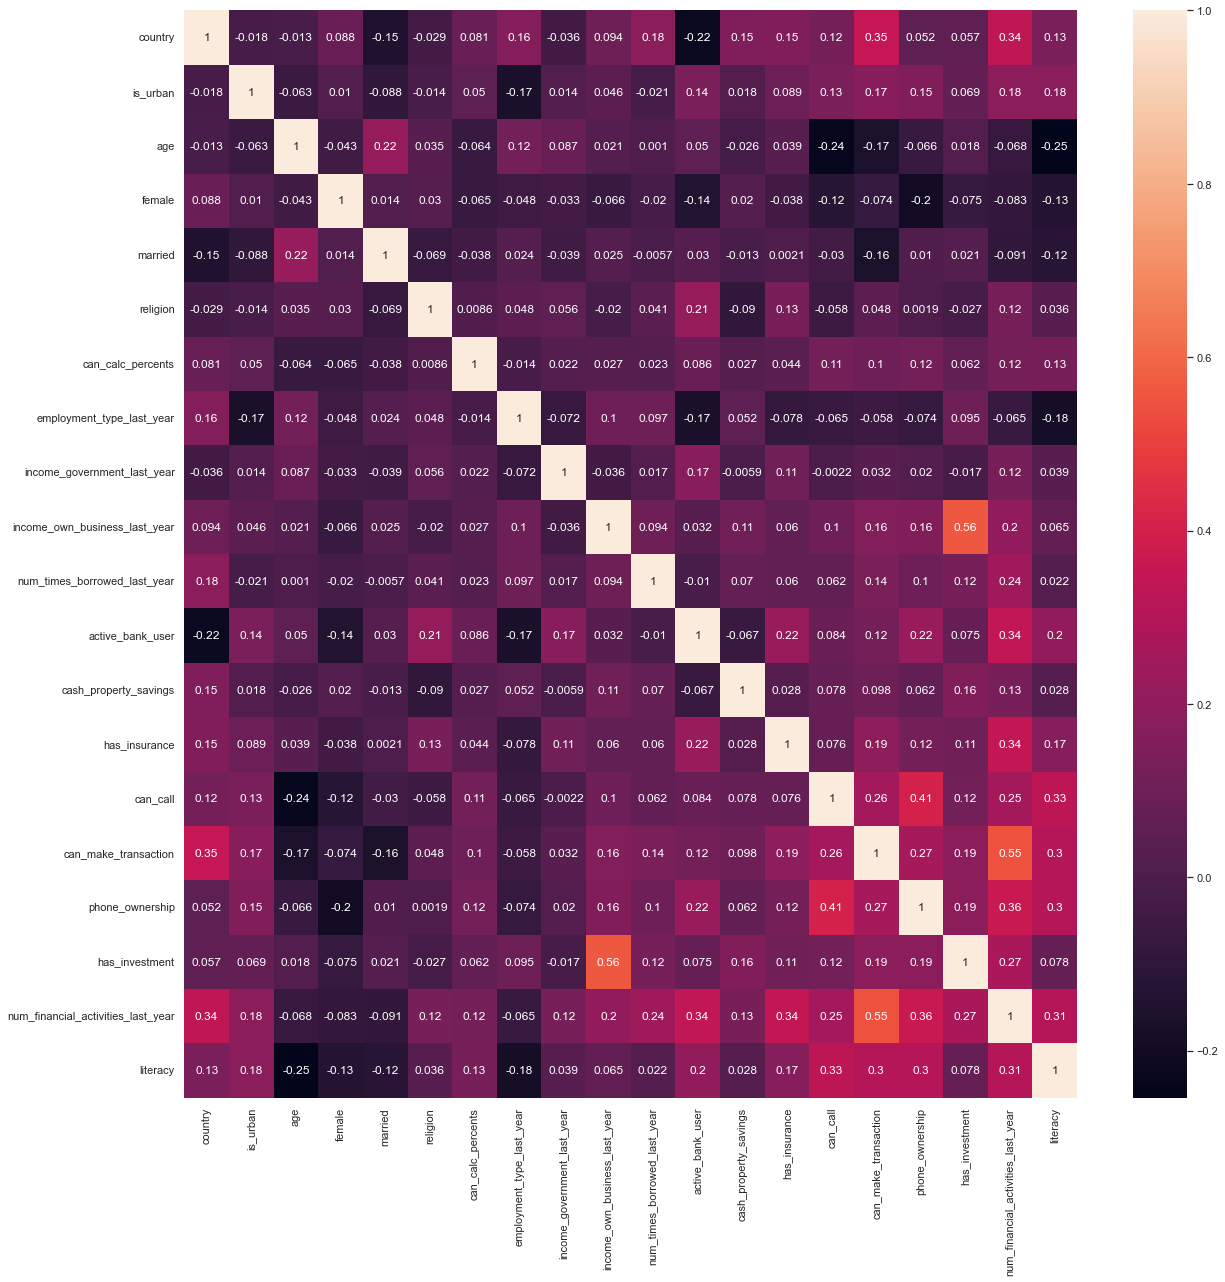

In [45]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

# Exporting

In [46]:
# Exporting the dataset
dfr.to_csv('invest_prep.csv', sep=';', index=False)

In [47]:
# Exporting the dataset
df.to_csv('invest_prep_сat_boost.csv', sep=';', index=False)

* экспортируем датасет с обработанными данными.